# lab2

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
train_data = pd.read_csv('./application_train.csv')

In [46]:
print(train_data.shape)
train_data.sample(10)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
294246,440889,0,Cash loans,F,Y,Y,0,225000.0,675000.0,53460.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
53346,161785,0,Revolving loans,M,Y,N,0,112500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
297822,445036,0,Cash loans,M,N,N,1,135000.0,536917.5,19413.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
167529,294206,0,Cash loans,F,N,Y,0,189000.0,1282500.0,84298.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
4561,105331,0,Cash loans,F,N,Y,1,81000.0,512064.0,25033.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
185780,315370,0,Cash loans,F,N,Y,0,90000.0,536917.5,22878.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
118064,236908,0,Cash loans,M,Y,Y,1,180000.0,557770.5,40716.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
141899,264527,0,Cash loans,F,N,Y,1,157500.0,512446.5,40617.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
60416,170045,0,Cash loans,F,N,N,0,157500.0,239850.0,23494.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
103927,220613,0,Cash loans,M,Y,Y,1,225000.0,508495.5,21672.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
print(train_data.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [48]:
print(", ".join(train_data.columns))

SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGA

In [49]:
#data cleaning & preprocessing 
train_data.drop(columns=['SK_ID_CURR'], inplace=True) #ця колонка точно не знадобиться

# Missing data

In [50]:
def get_null_counts(input_data):
    null_cols = input_data.columns[input_data.isnull().any()]

    null_counts = {}
    for col in null_cols:
        null_counts[col] = input_data[col].isnull().sum()

    null_counts = dict(sorted(null_counts.items(), key=lambda item: item[1]))

    return null_counts

def print_null_counts(null_counts, data_length):
    print("{:<35} {:<20} {:<10}".format('Column', 'Null Count', 'Null %'))
    print('-' * 70)
    for col, count in null_counts.items():
        null_percent = round(count / data_length * 100, 2)
        print("{:<35} {:<20} {:<10}%".format(col, count, null_percent))

In [51]:
null_counts = get_null_counts(train_data)
print_null_counts(null_counts, len(train_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE              1                    0.0       %
CNT_FAM_MEMBERS                     2                    0.0       %
AMT_ANNUITY                         12                   0.0       %
AMT_GOODS_PRICE                     278                  0.09      %
EXT_SOURCE_2                        660                  0.21      %
OBS_30_CNT_SOCIAL_CIRCLE            1021                 0.33      %
DEF_30_CNT_SOCIAL_CIRCLE            1021                 0.33      %
OBS_60_CNT_SOCIAL_CIRCLE            1021                 0.33      %
DEF_60_CNT_SOCIAL_CIRCLE            1021                 0.33      %
NAME_TYPE_SUITE                     1292                 0.42      %
AMT_REQ_CREDIT_BUREAU_HOUR          41519                13.5      %
AMT_REQ_CREDIT_BUREAU_DAY           41519                13.5      %
AMT_REQ_CREDIT_BUREAU_WEEK       

In [58]:
#видалимо стовпчики де багато пустих значень
columns_to_drop = []
for col, count in null_counts.items():
    if count > 278:
        columns_to_drop.append(col)
train_data.drop(columns=columns_to_drop, inplace=True)

In [59]:
null_counts = get_null_counts(train_data)
print_null_counts(null_counts, len(train_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE              1                    0.0       %
CNT_FAM_MEMBERS                     2                    0.0       %
AMT_ANNUITY                         12                   0.0       %
AMT_GOODS_PRICE                     278                  0.09      %


In [60]:
for col, count in null_counts.items():
    print(f"Data type of column {col}: {train_data[col].dtype}")

Data type of column DAYS_LAST_PHONE_CHANGE: float64
Data type of column CNT_FAM_MEMBERS: float64
Data type of column AMT_ANNUITY: float64
Data type of column AMT_GOODS_PRICE: float64


In [61]:
#видалимо рядки з пустими значеннями що лишилися
train_data.dropna(inplace=True)
null_counts = get_null_counts(train_data)
print_null_counts(null_counts, len(train_data))
train_data

Column                              Null Count           Null %    
----------------------------------------------------------------------


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0,0,0,0,0,0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0,0,0,0,0,0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,0,0,0,0,0,0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0,0,0,0,0,0


# Duplicates

In [62]:
train_data[train_data.duplicated()]#шукаємо дублікати

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
29287,0,Cash loans,M,Y,N,0,112500.0,269550.0,11547.0,225000.0,...,0,0,0,0,0,0,0,0,0,0
82410,0,Cash loans,M,Y,Y,2,360000.0,450000.0,47880.0,450000.0,...,0,0,0,0,0,0,0,0,0,0
83790,0,Cash loans,F,N,Y,0,157500.0,284400.0,15880.5,225000.0,...,0,0,0,0,0,0,0,0,0,0
127310,0,Cash loans,M,Y,N,0,202500.0,482530.5,26176.5,482530.5,...,0,0,0,0,0,0,0,0,0,0
131412,0,Cash loans,F,N,Y,0,81000.0,239850.0,23494.5,225000.0,...,0,0,0,0,0,0,0,0,0,0
171859,0,Cash loans,F,N,Y,0,117000.0,254700.0,24939.0,225000.0,...,0,0,0,0,0,0,0,0,0,0
172053,0,Cash loans,F,N,Y,0,126000.0,284400.0,16011.0,225000.0,...,0,0,0,0,0,0,0,0,0,0
186705,0,Cash loans,F,Y,Y,0,256500.0,769909.5,73102.5,769909.5,...,0,0,0,0,0,0,0,0,0,0
261724,0,Cash loans,F,N,Y,1,112500.0,225000.0,11074.5,225000.0,...,0,0,0,0,0,0,0,0,0,0
297684,1,Cash loans,M,Y,Y,0,180000.0,592560.0,31153.5,450000.0,...,0,0,0,0,0,0,0,0,0,0


# Distribution

In [63]:
train_data.describe(include='all')

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307220.000000,307220,307220,307220,307220,307220.000000,3.072200e+05,3.072200e+05,307220.000000,3.072200e+05,...,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000,307220.000000
unique,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,278219,202251,202637,213085,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.080737,NaN,NaN,NaN,NaN,0.416978,1.688327e+05,5.993174e+05,27120.456294,5.383983e+05,...,0.000007,0.003528,0.002939,0.001211,0.009938,0.000267,0.008134,0.000596,0.000508,0.000329
std,0.272431,NaN,NaN,NaN,NaN,0.722048,2.372203e+05,4.025198e+05,14492.130232,3.694486e+05,...,0.002551,0.059296,0.054135,0.034776,0.099191,0.016335,0.089823,0.024399,0.022528,0.018129
min,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,NaN,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


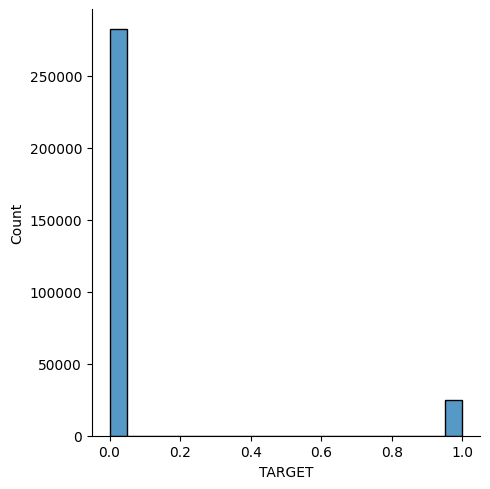

In [64]:
sns.displot(train_data['TARGET'], kde=False)#дивимося розподіл значень TARGET. Очевидно дані незбалансовані

In [65]:
categorical_features = train_data.select_dtypes(exclude=['int64', 'float64']).columns 
print(categorical_features)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')


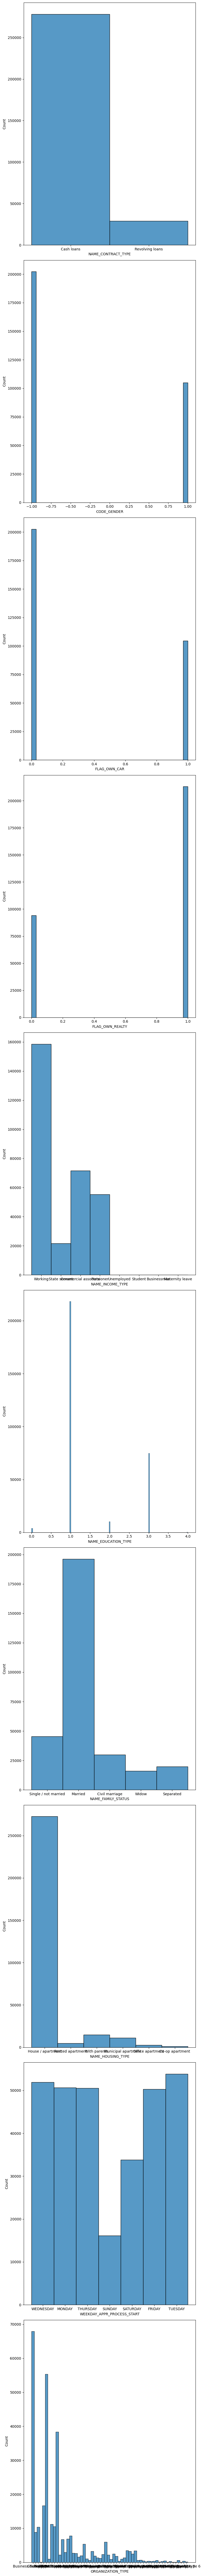

In [133]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 30))
fig.set_size_inches(8,100)
for i, col in enumerate(categorical_features):#переглянемо розподіли всіх категоріальних фіч
    sns.histplot(train_data[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>],
       [<Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: 

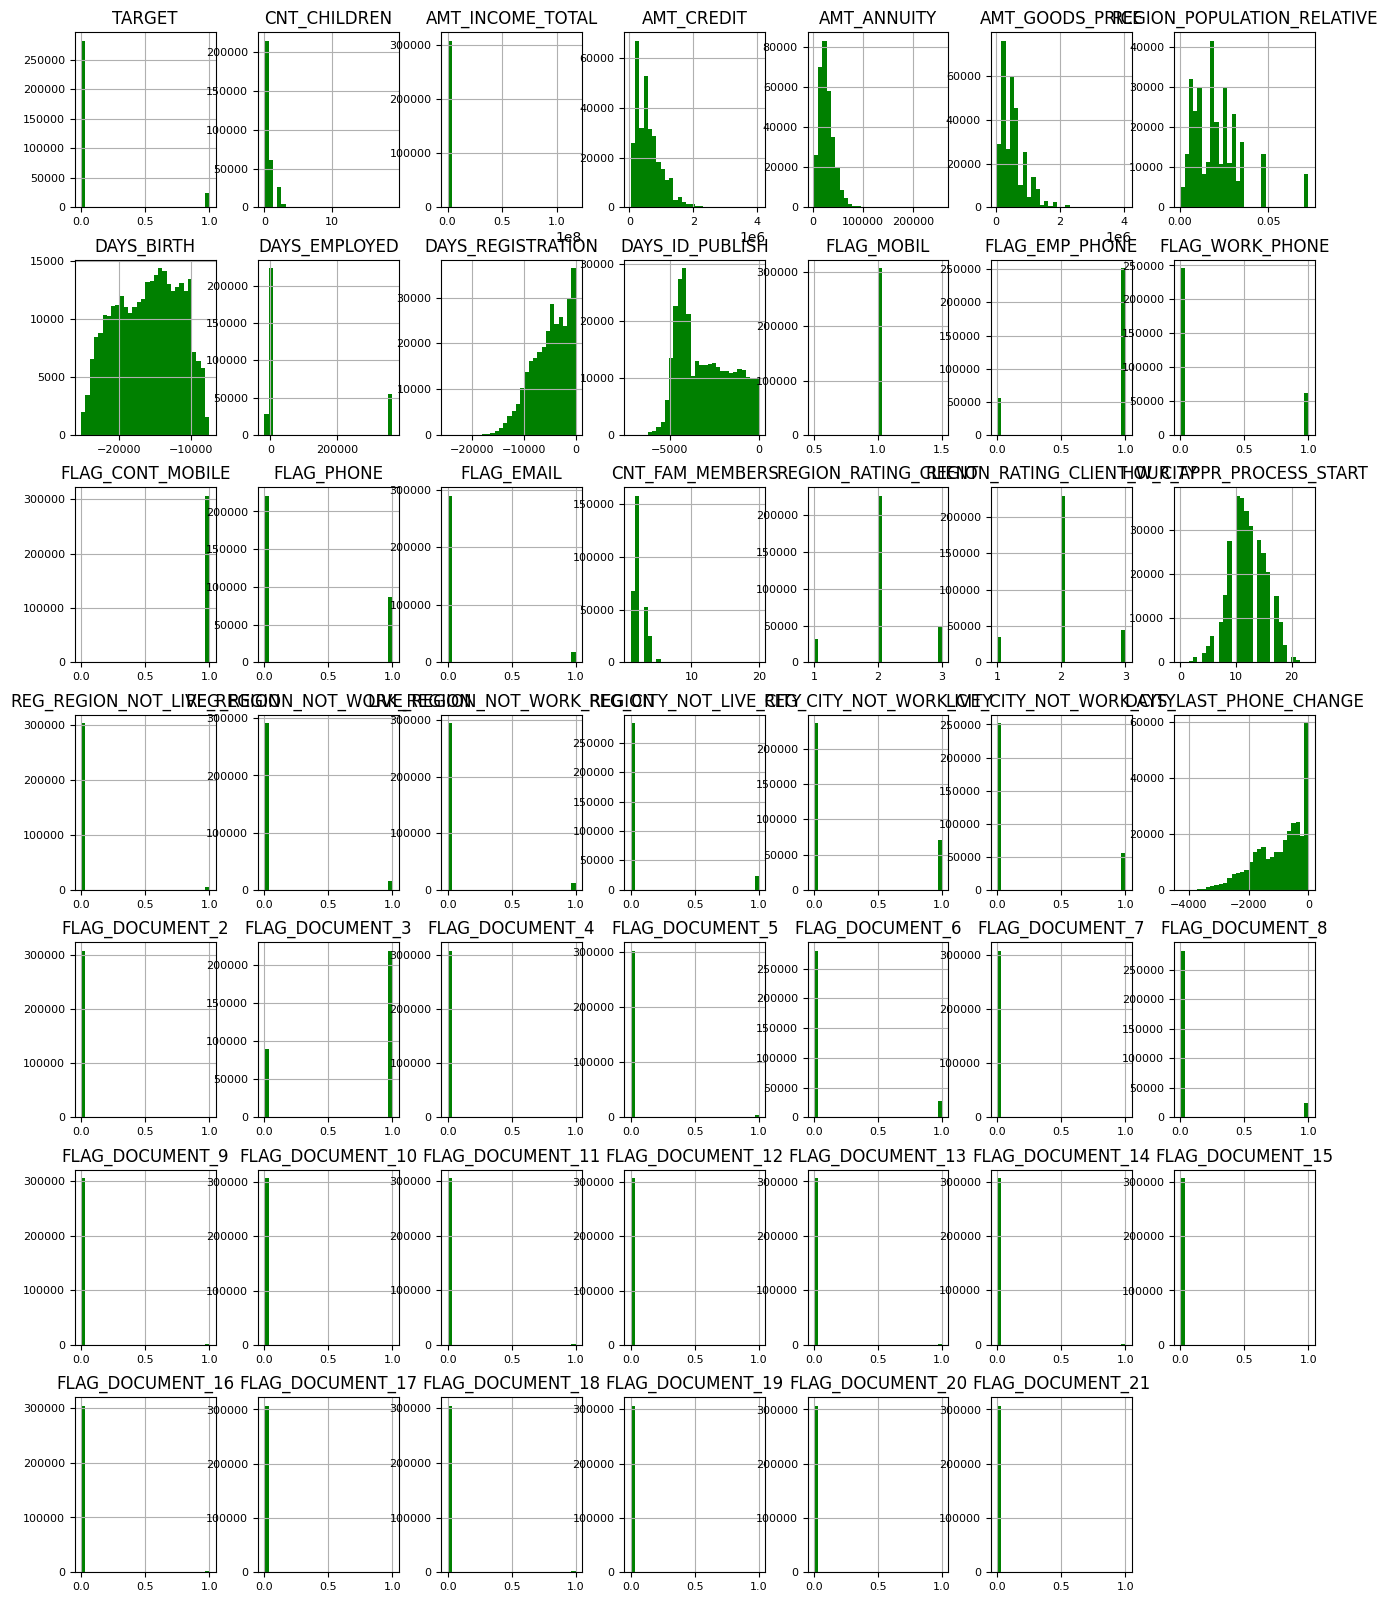

In [67]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns#тепер переглянемо розподіли числових фіч
train_data[numerical_features].hist(figsize = (16,20), color='g', bins=30, xlabelsize=8, ylabelsize=8)

In [37]:
train_data[numerical_features].median()

TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               157500.000000
AMT_CREDIT                     521280.000000
REGION_POPULATION_RELATIVE          0.018850
DAYS_EMPLOYED                   -1280.000000
DAYS_REGISTRATION               -4515.000000
DAYS_ID_PUBLISH                 -3336.000000
FLAG_MOBIL                          1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
HOUR_APPR_PROCESS_START            12.000000
REG_REGION_NOT_LIVE_REGION          0.000000
LIVE_REGION_NOT_WORK_REGION         0.000000
REG_CITY_NOT_WORK_CITY              0.000000
EXT_SOURCE_2                        0.569999
EXT_SOURCE_3                        0.535276
OBS_30_CNT_SOCIAL_CIRCLE            0.000000
DEF_60_CNT_SOCIAL_CIRCLE            0.000000
DAYS_LAST_PHONE_CHANGE           -809.000000
FLAG_DOCUM

In [68]:
train_data[numerical_features].mean()

TARGET                              0.080737
CNT_CHILDREN                        0.416978
AMT_INCOME_TOTAL               168832.697884
AMT_CREDIT                     599317.354223
AMT_ANNUITY                     27120.456294
AMT_GOODS_PRICE                538398.278097
REGION_POPULATION_RELATIVE          0.020870
DAYS_BIRTH                     -16038.811428
DAYS_EMPLOYED                   63851.304010
DAYS_REGISTRATION               -4986.328699
DAYS_ID_PUBLISH                 -2994.390476
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      0.819790
FLAG_WORK_PHONE                     0.198867
FLAG_CONT_MOBILE                    0.998132
FLAG_PHONE                          0.280646
FLAG_EMAIL                          0.056712
CNT_FAM_MEMBERS                     2.152627
REGION_RATING_CLIENT                2.052454
REGION_RATING_CLIENT_W_CITY         2.031499
HOUR_APPR_PROCESS_START            12.063017
REG_REGION_NOT_LIVE_REGION          0.015149
REG_REGION

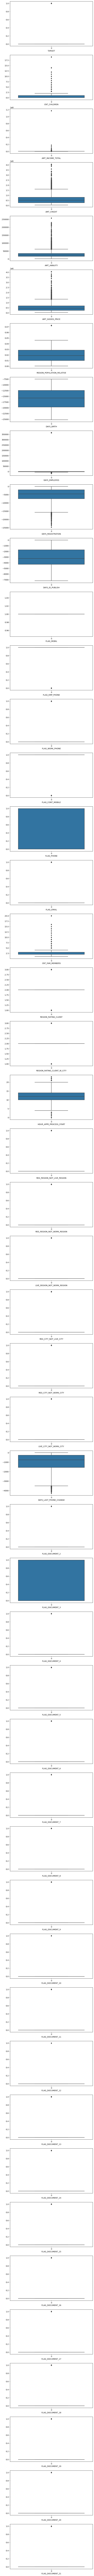

In [78]:
# outliers
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 30))
fig.set_size_inches(8,250)
for i, col in enumerate(numerical_features):
    sns.boxplot(train_data[col], ax=axes[i])
    axes[i].set_xlabel(col)
plt.show()

<Axes: >

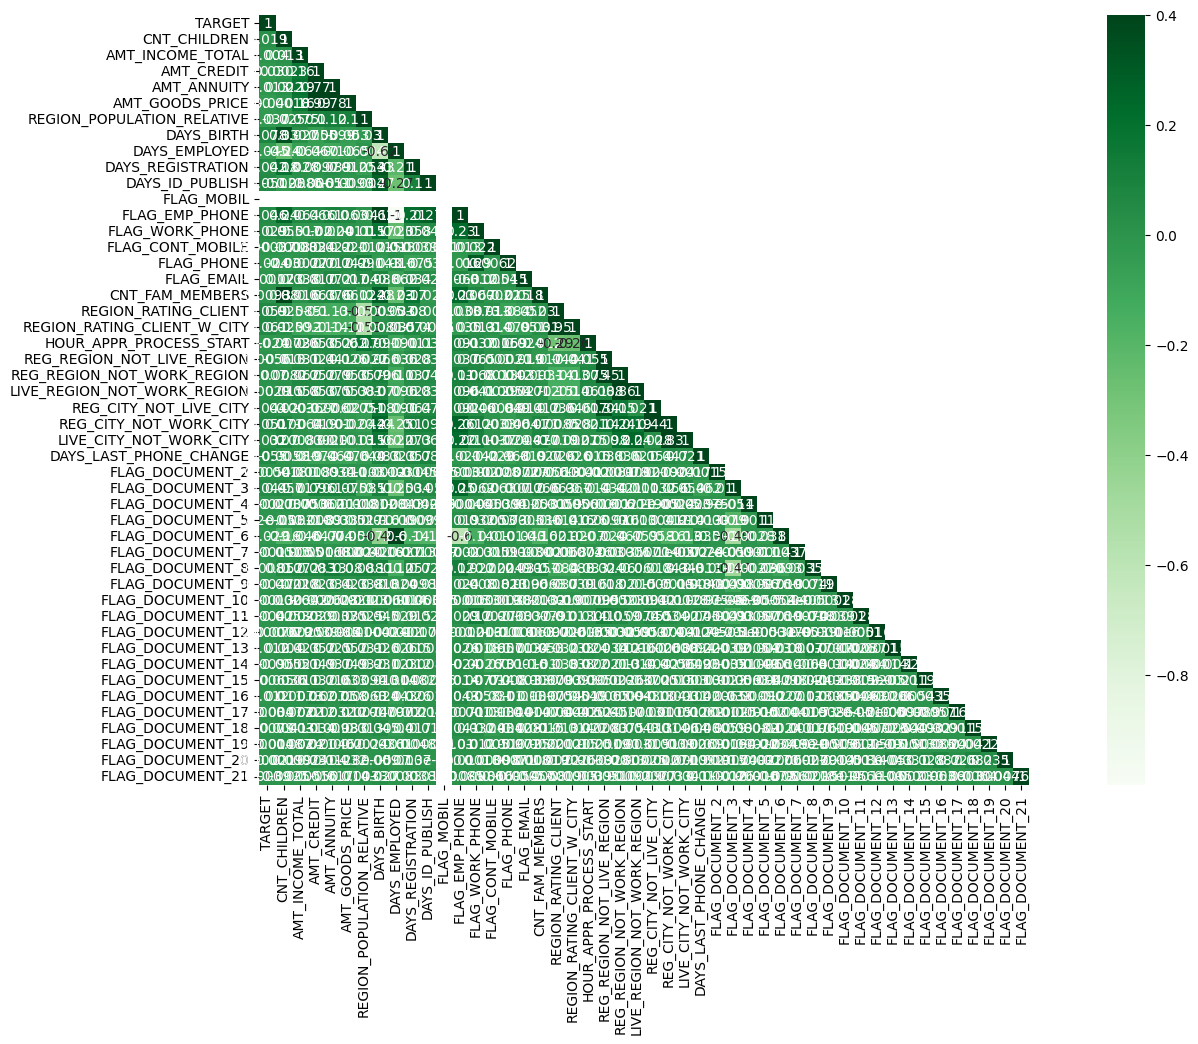

In [79]:
corrMatt = train_data[numerical_features].corr()#візуалізуємо кореляцію фіч один з одним
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask, vmax=0.4, square=True, annot=True)

In [80]:
print(", ".join(train_data.columns))
print(train_data.dtypes)

TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_

In [83]:
#обираємо фічі які не сильно корелюються для тренування
features_for_training = ['TARGET','CODE_GENDER','FLAG_OWN_CAR',
                           'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
                           'AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED',
                           'FLAG_MOBIL','REGION_RATING_CLIENT',
                           'LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE']
categorical_training_columns = train_data[features_for_training].select_dtypes(exclude=['int64', 'float64']).columns
numerical_training_columns = train_data[features_for_training].select_dtypes(include=['int64', 'float64']).columns
print('categorical_training_columns: ', categorical_training_columns)
print('numerical_training_columns:',numerical_training_columns)

categorical_training_columns:  Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_EDUCATION_TYPE'],
      dtype='object')
numerical_training_columns: Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'REGION_RATING_CLIENT', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')


In [84]:
#виділяємо значення категоріальних фіч для подальшої обробки
for col in categorical_training_columns:
    un = train_data[col].unique()
    print(col, ': ',un)

CODE_GENDER :  ['M' 'F' 'XNA']
FLAG_OWN_CAR :  ['N' 'Y']
FLAG_OWN_REALTY :  ['Y' 'N']
NAME_EDUCATION_TYPE :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [87]:
numeric_representation = {#створюємо числову репрезентацію категоріальних значень фіч
    "CODE_GENDER" : {'M':1, 'F':-1, 'XNA':0},
    "FLAG_OWN_CAR": {'N':0, 'Y':1},
    "FLAG_OWN_REALTY" : {'N':0, 'Y':1},
    "NAME_EDUCATION_TYPE" : {'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4}
}
# замінюємо категорії на числа
train_data.replace(numeric_representation, inplace=True)

# перевірка
print(train_data[categorical_training_columns].head())

   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_EDUCATION_TYPE
0            1             0                1                    1
1           -1             0                0                    3
2            1             1                1                    1
3           -1             0                1                    1
4            1             0                1                    1


In [88]:
train_data[categorical_training_columns].dtypes# перевірка

CODE_GENDER            int64
FLAG_OWN_CAR           int64
FLAG_OWN_REALTY        int64
NAME_EDUCATION_TYPE    int64
dtype: object

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [92]:
selected_train_data = train_data[features_for_training]
selected_train_data

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,REGION_RATING_CLIENT,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE
0,1,1,0,1,0,202500.0,406597.5,351000.0,-9461,-637,1,2,0,1
1,0,-1,0,0,0,270000.0,1293502.5,1129500.0,-16765,-1188,1,1,0,3
2,0,1,1,1,0,67500.0,135000.0,135000.0,-19046,-225,1,2,0,1
3,0,-1,0,1,0,135000.0,312682.5,297000.0,-19005,-3039,1,2,0,1
4,0,1,0,1,0,121500.0,513000.0,513000.0,-19932,-3038,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,157500.0,254700.0,225000.0,-9327,-236,1,1,0,1
307507,0,-1,0,1,0,72000.0,269550.0,225000.0,-20775,365243,1,2,0,1
307508,0,-1,0,1,0,153000.0,677664.0,585000.0,-14966,-7921,1,3,1,3
307509,1,-1,0,1,0,171000.0,370107.0,319500.0,-11961,-4786,1,2,0,1


In [103]:
train_data_for_classification = selected_train_data.drop("TARGET", axis=1)
features_for_training.remove("TARGET")

ValueError: list.remove(x): x not in list

# EDA for test data

In [100]:
#підготуємо тестові дані так само як і для тренування
test_data = pd.read_csv('./application_test.csv')
test_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [107]:
test_data = test_data[features_for_training]

In [108]:
null_counts = get_null_counts(test_data)
print_null_counts(null_counts, len(test_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------


In [109]:
test_data.replace(numeric_representation, inplace=True)
test_data

C:\Users\stern\AppData\Local\Temp\ipykernel_12316\14680988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.replace(numeric_representation, inplace=True)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,REGION_RATING_CLIENT,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE
0,-1,0,1,0,135000.0,568800.0,450000.0,-19241,-2329,1,2,0,3
1,1,0,1,0,99000.0,222768.0,180000.0,-18064,-4469,1,2,0,1
2,1,1,1,0,202500.0,663264.0,630000.0,-20038,-4458,1,2,0,3
3,-1,0,1,2,315000.0,1575000.0,1575000.0,-13976,-1866,1,2,0,1
4,1,1,0,1,180000.0,625500.0,625500.0,-13040,-2191,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-1,0,1,0,121500.0,412560.0,270000.0,-19970,-5169,1,3,0,1
48740,-1,0,0,2,157500.0,622413.0,495000.0,-11186,-1149,1,2,1,1
48741,-1,1,1,1,202500.0,315000.0,315000.0,-15922,-3037,1,2,0,1
48742,1,0,0,0,225000.0,450000.0,450000.0,-13968,-2731,1,2,1,3


# Classification

In [111]:
from sklearn.metrics import roc_auc_score

In [118]:
# Розділимо дані на набори для тренувань і валідації
X_train, X_val, y_train, y_val = train_test_split(train_data_for_classification, train_data['TARGET'], test_size=0.2)

# створення моделі
lr_model = LogisticRegression(class_weight="balanced", max_iter=2000)
lr_model.fit(X_train, y_train)

# робимо "передбачення"
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Точність на тренувальних даних
print("Training Data:")
print("Accuracy: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_train, y_train_pred)))

# Точність на валідаційних даних
print("\nValidation Data:")
print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_val_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_val, y_val_pred)))

Training Data:
Accuracy: 0.5849
ROC AUC Score: 0.5619

Validation Data:
Accuracy: 0.5809
ROC AUC Score: 0.5593


In [119]:
y_test_pred = lr_model.predict(test_data)
y_test_pred#результат роботи моделі на тестових даних

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

# Save Result

In [131]:
origin_test_data = pd.read_csv('./application_test.csv')

# створення датафрейму з SK_ID_CURR та передбаченими TARGET
result = pd.DataFrame({'SK_ID_CURR': origin_test_data['SK_ID_CURR'], 'TARGET': y_test_pred})

#зберігаємо результат
result.to_csv('./result.csv', index=False)

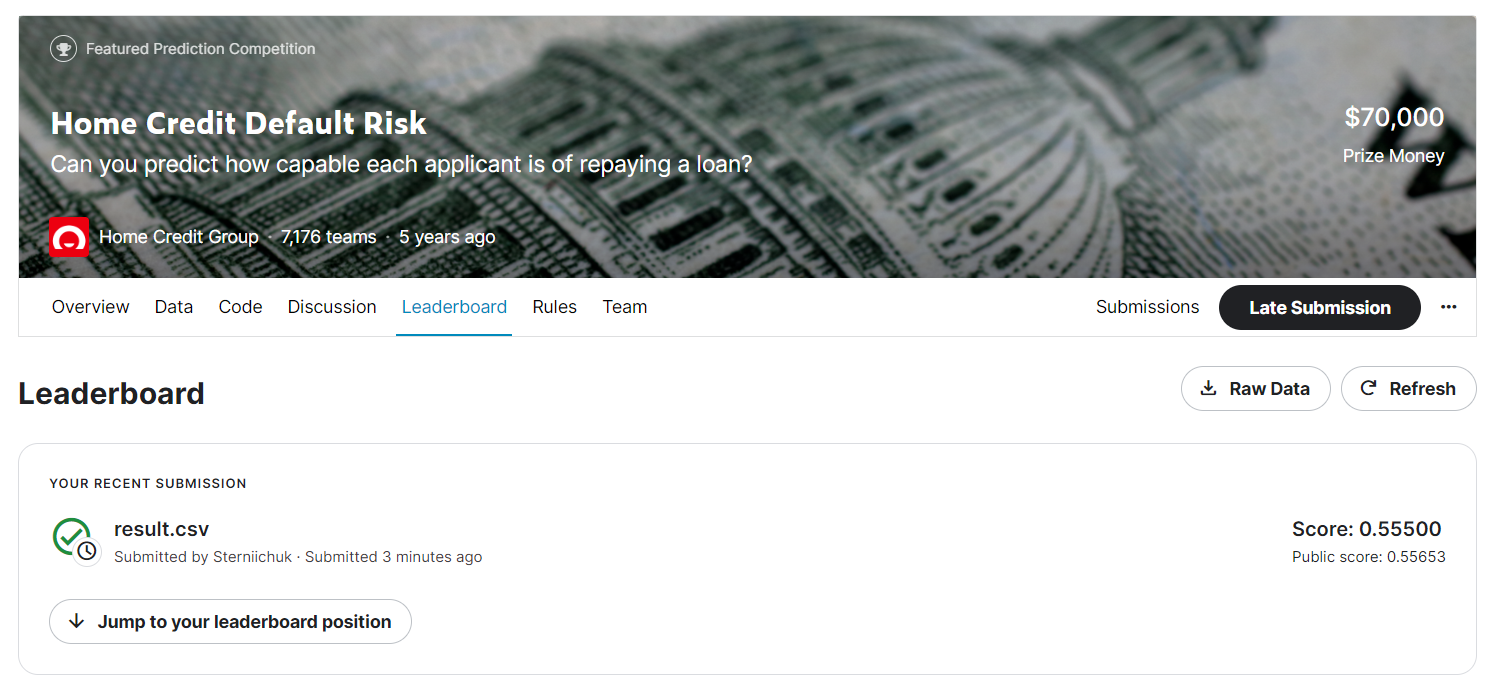